## Practical Use of PCA : Visualize higher Dimensional representations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

The csv file stores the optimal representation of images of MNIST data. Each row of csv file contains following information about each 28x28 grayscale image : 10 coordinates(For it's optimal representation in 10-D space ) and 1 label ( 1 value from 0 to 9 representing the number written on it.)

In [2]:
data = pd.read_csv("mnist.csv",header=None,delimiter=' ')
print(data.head())

          0          1          2          3          4          5   \
0  -5.548414  -4.347044  17.336727   5.324456 -63.053795  -2.012612   
1  19.203651   2.742153  66.608887   1.476059 -12.971231 -26.400364   
2 -11.752416  38.515057   0.486983 -11.933537  -1.689758   6.619890   
3  49.533222 -15.815386  -4.164280  -8.867099 -11.651428 -21.025238   
4 -21.316278 -10.953627   4.064837 -37.619030  60.450481   4.804214   

          6           7          8          9    10  
0 -58.092113  148.907974 -32.563049  -1.887786  7.0  
1  13.100376  -21.055958 -21.868355 -25.401766  2.0  
2   1.408620    3.973868  -6.195178 -17.078556  1.0  
3  23.474003   -4.240177  -8.497236   1.028856  0.0  
4   6.607393  -20.284491  -3.912776  20.747328  4.0  


In [3]:
image_data = data.to_numpy()
print(image_data.shape)
X = image_data[:,:-1]
print("--- Original representation shape ---")
print(X.shape)
print("--- Image labels ---")
label = image_data[:,-1:].astype(int)
print(label.shape)

(5008, 11)
--- Original representation shape ---
(5008, 10)
--- Image labels ---
(5008, 1)


In [4]:
import numpy.linalg as LA
eigen_val,eigen_vec = LA.eigh(np.transpose(X) @ X)
print(eigen_val.shape)
print(eigen_vec.shape)
D = eigen_vec[-2:,:]
C = X @ np.transpose(D)
print("------Encoded values shape ---\n",C.shape)
X_approx = C @ D
print("------Decoded values shape ---\n",X_approx.shape)

(10,)
(10, 10)
------Encoded values shape ---
 (5008, 2)
------Decoded values shape ---
 (5008, 10)


## Interesting Grouping of same category

We can see that the representation of images in same category are very near each other. The boundries between different groups might not be clear in 2-D but the actual representation are in 10-D space where this boundry will be very much clear and thus helpful in making decision when a new image is presented. We can visualize the data in 3-D space too , the distinction between group will be lot more clear.

There are different ways of Visualizing higher dimensional data. The [awesome article](http://colah.github.io/posts/2014-10-Visualizing-MNIST/) offers some great visulization using different techniques. Quoting from the article :

>   "There’s no way to map high-dimensional data into low dimensions and preserve all the structure. So, an approach must make trade-offs,    sacrificing one property to preserve another. PCA tries to preserve linear structure, MDS tries to preserve global geometry, and t-SNE  tries to preserve topology (neighborhood structure)."


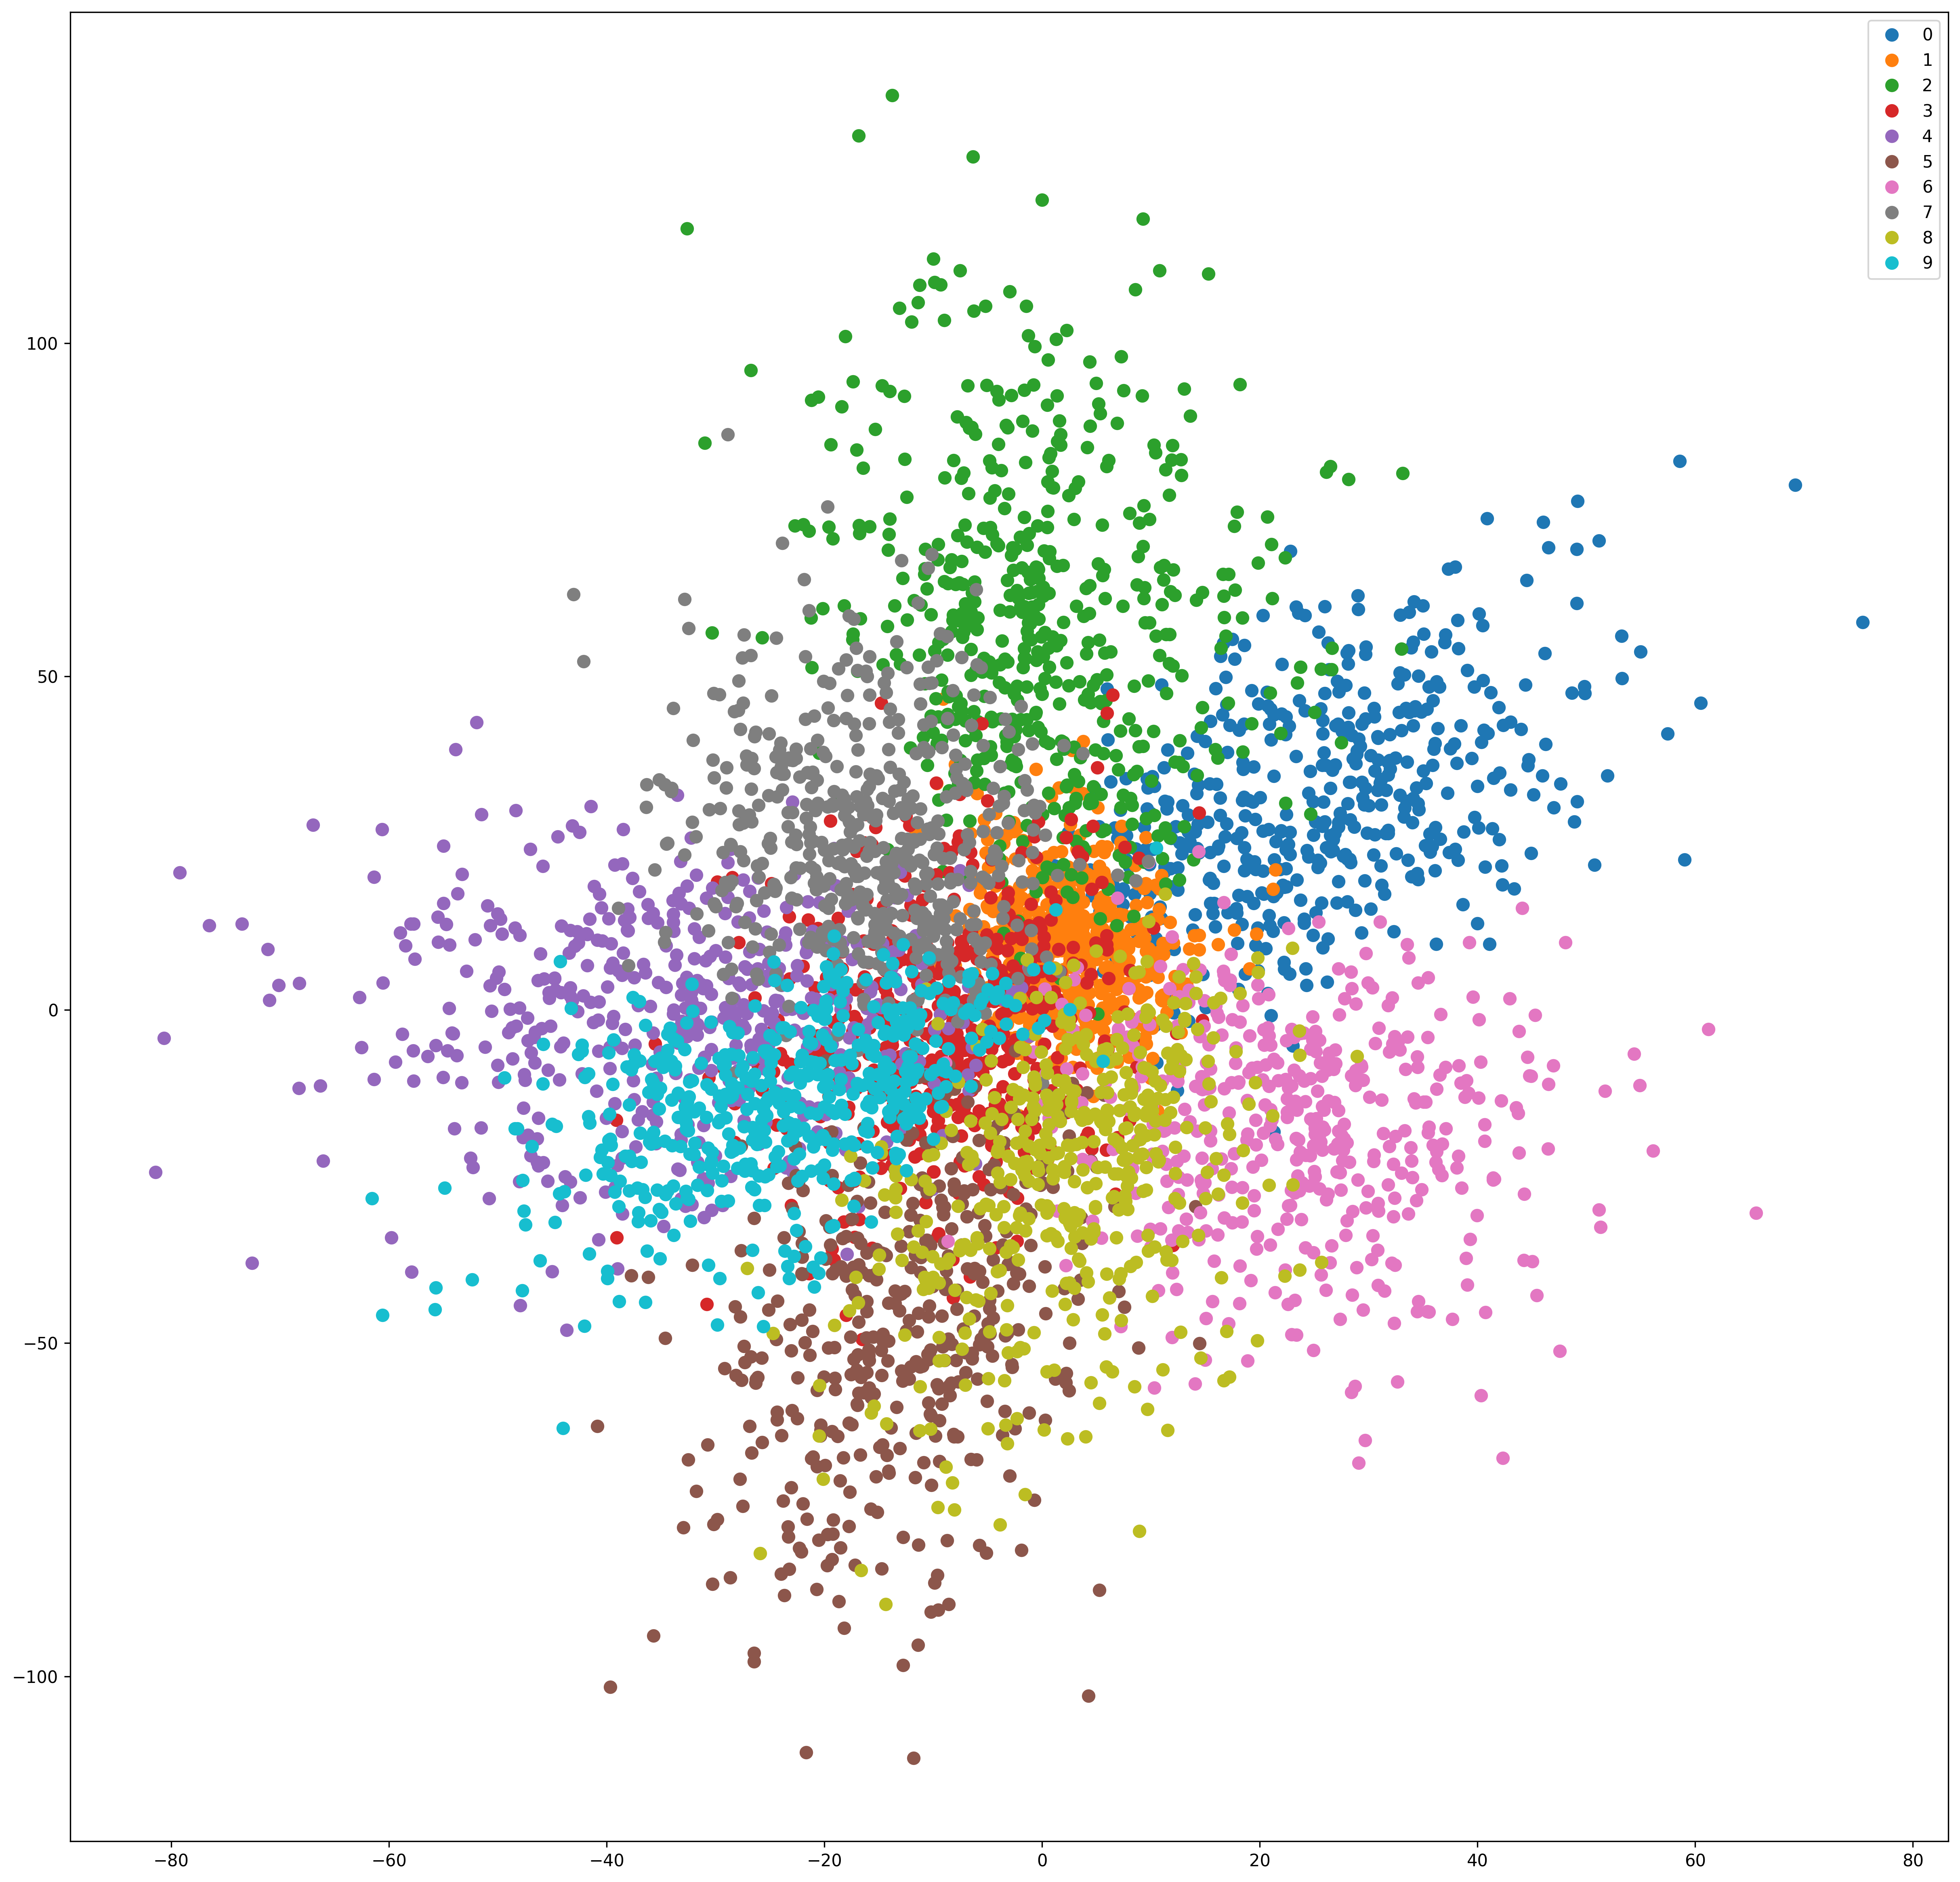

In [5]:
import matplotlib.cm as cm
df = pd.DataFrame(dict(x=C[:,0].squeeze(),y=C[:,1].squeeze(),label=label.squeeze()))
groups = df.groupby('label')
df.head()
fig = plt.figure(figsize=(20,20),dpi=300)
ax = fig.add_subplot()
for name,group in groups:
    ax.plot(group.x,group.y,marker='o',linestyle='',ms=7,label = str(name))
ax.legend()
plt.show()